In [1]:
from PyHa.statistics import *
from PyHa.IsoAutio import *
from PyHa.visualizations import *
import pandas as pd

/Users/mugetronblue/opt/anaconda3/envs/species-id/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/mugetronblue/opt/anaconda3/envs/species-id/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/mugetronblue/opt/anaconda3/envs/species-id/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [2]:
import torch

print(torch.__version__)
print(torch)

1.11.0
<module 'torch' from '/Users/mugetronblue/opt/anaconda3/envs/species-id/lib/python3.7/site-packages/torch/__init__.py'>


## Running Moment to Moment Labeling System on a Directory of WAV Files 

In [3]:
path = "./TEST/"
tweety_output=True

### Dictionary that defines the isolation technique and parameters used to generate automated labels 

In [4]:
isolation_parameters = {
    "technique" : "steinberg",
    "threshold_type" : "median",
    "threshold_const" : 1.0,
    "threshold_min" : 0.01,
    "window_size" : 0.2,
    "chunk_size" : 0.2
}

In [5]:
automated_df = generate_automated_labels(path,isolation_parameters, ml_model="tweetynet", tweety_output=tweety_output, normalize_local_scores=True); #make this function work with tweetynet
# need a better way to generate our output. 

pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
(1032,)
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
(1548,)
pred shape torch.Size([1, 86])
pred shape torch.Size([

### Pandas Ouput of Automated Labeling 

In [6]:
automated_df

FOLDER                    IN FILE  CHANNEL  CLIP LENGTH  SAMPLE RATE  \
0    ./TEST/  Aburria-aburri-257423.wav        0    24.633469        44100   
1    ./TEST/  Aburria-aburri-257423.wav        0    24.633469        44100   
2    ./TEST/  Aburria-aburri-257423.wav        0    24.633469        44100   
3    ./TEST/  Aburria-aburri-257423.wav        0    24.633469        44100   
4    ./TEST/  Aburria-aburri-257423.wav        0    24.633469        44100   
..       ...                        ...      ...          ...          ...   
154  ./TEST/         ScreamingPiha4.wav        0    13.557551        44100   
155  ./TEST/         ScreamingPiha4.wav        0    13.557551        44100   
156  ./TEST/         ScreamingPiha4.wav        0    13.557551        44100   
157  ./TEST/         ScreamingPiha4.wav        0    13.557551        44100   
158  ./TEST/         ScreamingPiha4.wav        0    13.557551        44100   

        OFFSET  DURATION MANUAL ID  
0     2.333197  3.491973      bird  
1     6.961043  2.036825      bird  
2    12.185261  0.200000      bird  
3    15.930476  0.200000      bird  
4    19.675692  3.682812      bird  
..         ...       ...       ...  
154   3.707483  0.436327      bird  
155   4.285170  0.646395      bird  
156  10.009524  1.355374      bird  
157  11.453741  1.145306      bird  
158  12.897959  0.659592      bird  

[159 rows x 8 columns]

### Function that gathers statistics about the duration of annotations

In [7]:
annotation_duration_statistics(automated_df)

COUNT  MODE      MEAN  STANDARD DEVIATION  MIN        Q1    MEDIAN  \
0    159   0.2  1.123684            0.930388  0.2  0.411633  0.756735   

         Q3       MAX  
0  1.724036  4.305918

### Human Manual Labels for Comparison 

In [8]:
manual_df = pd.read_csv("ScreamingPiha_Manual_Labels.csv")
#manual_df = pd.read_csv("BirdCLEF2020_Validation.csv")
manual_df

FOLDER             IN FILE  CLIP LENGTH  CHANNEL   OFFSET  DURATION  \
0    ./TEST/  ScreamingPiha1.wav      32.6160        0   1.5448    2.1297   
1    ./TEST/  ScreamingPiha1.wav      32.6160        0  10.1638    0.8498   
2    ./TEST/  ScreamingPiha1.wav      32.6160        0   0.5549    0.9999   
3    ./TEST/  ScreamingPiha1.wav      32.6160        0   8.7739    0.8399   
4    ./TEST/  ScreamingPiha1.wav      32.6160        0  12.6335    1.9997   
..       ...                 ...          ...      ...      ...       ...   
249  ./TEST/  ScreamingPiha2.wav      33.9331        0  26.9274    1.7602   
250  ./TEST/  ScreamingPiha2.wav      33.9331        0  30.8178    0.7200   
251  ./TEST/  ScreamingPiha2.wav      33.9331        0  29.8677    0.9401   
252  ./TEST/  ScreamingPiha2.wav      33.9331        0  31.5378    1.9502   
253  ./TEST/  ScreamingPiha2.wav      33.9331        0  33.7880    0.1100   

     SAMPLING RATE MANUAL ID  
0            16000      bird  
1            16000      bird  
2            16000      bird  
3            16000      bird  
4            16000      bird  
..             ...       ...  
249          44100      bird  
250          44100      bird  
251          44100      bird  
252          44100      bird  
253          44100      bird  

[254 rows x 8 columns]

In [9]:
annotation_duration_statistics(manual_df)

COUNT  MODE      MEAN  STANDARD DEVIATION   MIN        Q1   MEDIAN  \
0    254  1.87  1.068224            0.664488  0.11  0.532475  0.78005   

         Q3     MAX  
0  1.767475  3.1199

### Histogram Visualization of Annotation Lengths

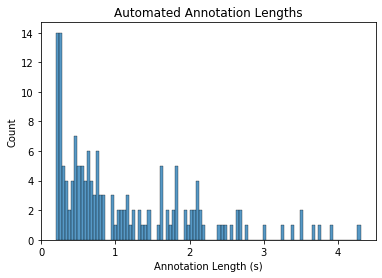

In [10]:
annotation_duration_histogram(automated_df, n_bins = 100, title = "Automated Annotation Lengths")

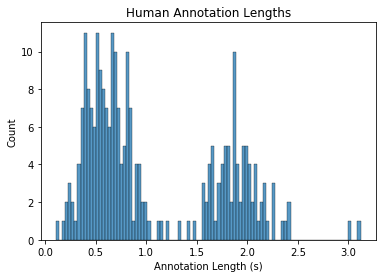

In [11]:
annotation_duration_histogram(manual_df, n_bins = 100, title = "Human Annotation Lengths")
# In the Screaming Piha clips we can see two distinct clusters based on the "Whoa" vocalizations (.25-1.25s)
# and the "Pee-Haw" vocalizations (1.25-2.5s)

### Helper function to convert to kaleidoscope-compatible format 

In [12]:
kaleidoscope_conversion(manual_df)

FOLDER             IN FILE  CHANNEL   OFFSET  DURATION MANUAL ID
0    ./TEST  ScreamingPiha1.wav        0   1.5448    2.1297      bird
1    ./TEST  ScreamingPiha1.wav        0  10.1638    0.8498      bird
2    ./TEST  ScreamingPiha1.wav        0   0.5549    0.9999      bird
3    ./TEST  ScreamingPiha1.wav        0   8.7739    0.8399      bird
4    ./TEST  ScreamingPiha1.wav        0  12.6335    1.9997      bird
..      ...                 ...      ...      ...       ...       ...
249  ./TEST  ScreamingPiha2.wav        0  26.9274    1.7602      bird
250  ./TEST  ScreamingPiha2.wav        0  30.8178    0.7200      bird
251  ./TEST  ScreamingPiha2.wav        0  29.8677    0.9401      bird
252  ./TEST  ScreamingPiha2.wav        0  31.5378    1.9502      bird
253  ./TEST  ScreamingPiha2.wav        0  33.7880    0.1100      bird

[254 rows x 6 columns]

## Different Combinations of Local Score Visualization Graphs

### Baseline Graph without any annotations

No handles with labels found to put in legend.


pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
(1462,)


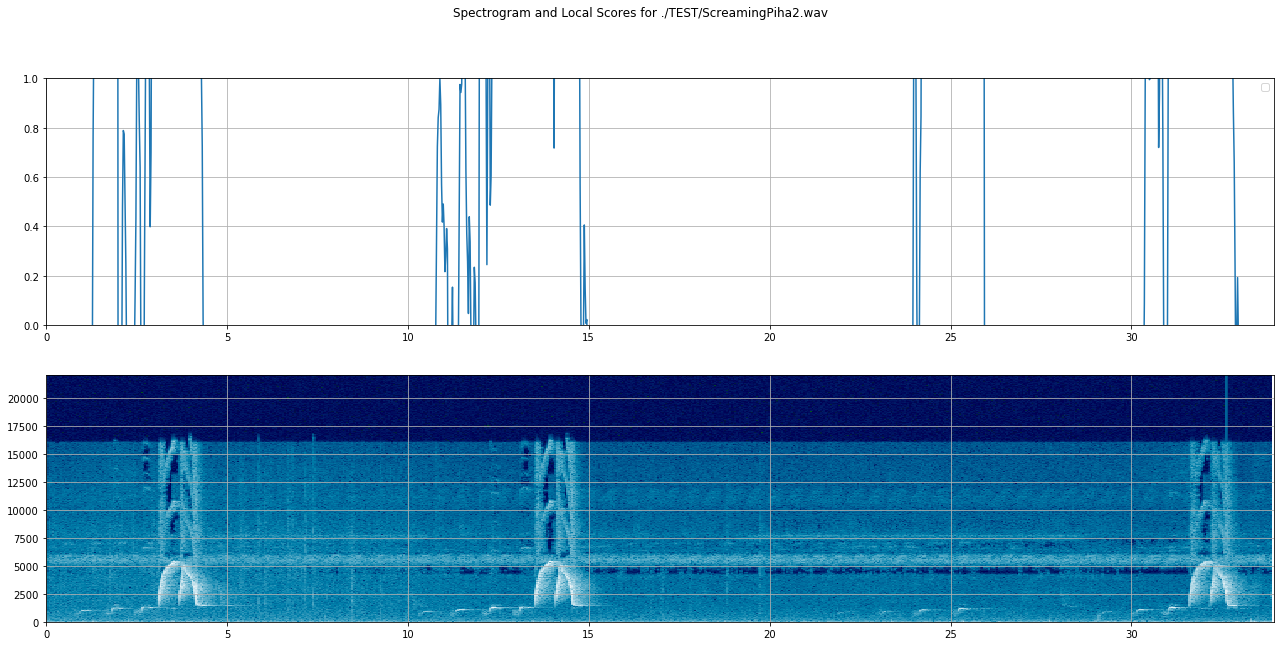

In [13]:
clip_path = "./TEST/ScreamingPiha2.wav"
local_score_visualization(clip_path, tweety_output=tweety_output)

### Baseline graph with log scale

No handles with labels found to put in legend.


pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
(1462,)


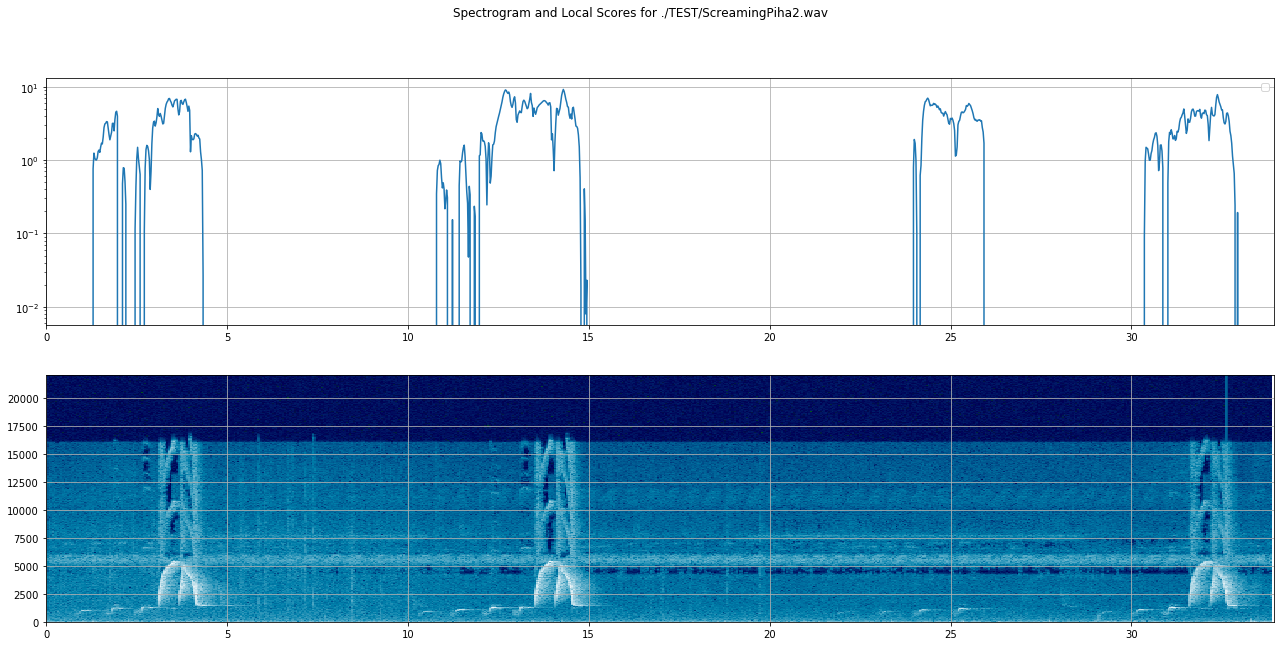

In [14]:
local_score_visualization(clip_path,log_scale = True, tweety_output=tweety_output)

### Baseline graph with normalized local score values between [0,1] 

No handles with labels found to put in legend.


pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
(1462,)


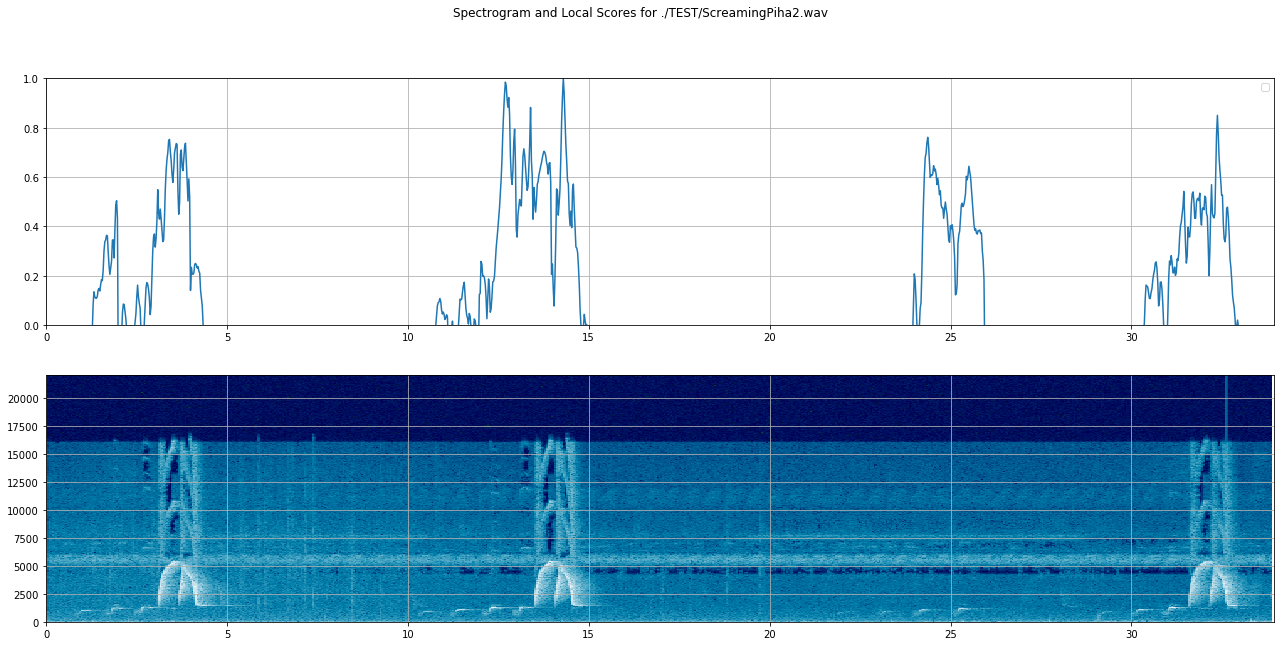

In [15]:
local_score_visualization(clip_path, normalize_local_scores = True, tweety_output=tweety_output)

### Graph with Automated Labeling 

pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
(1462,)


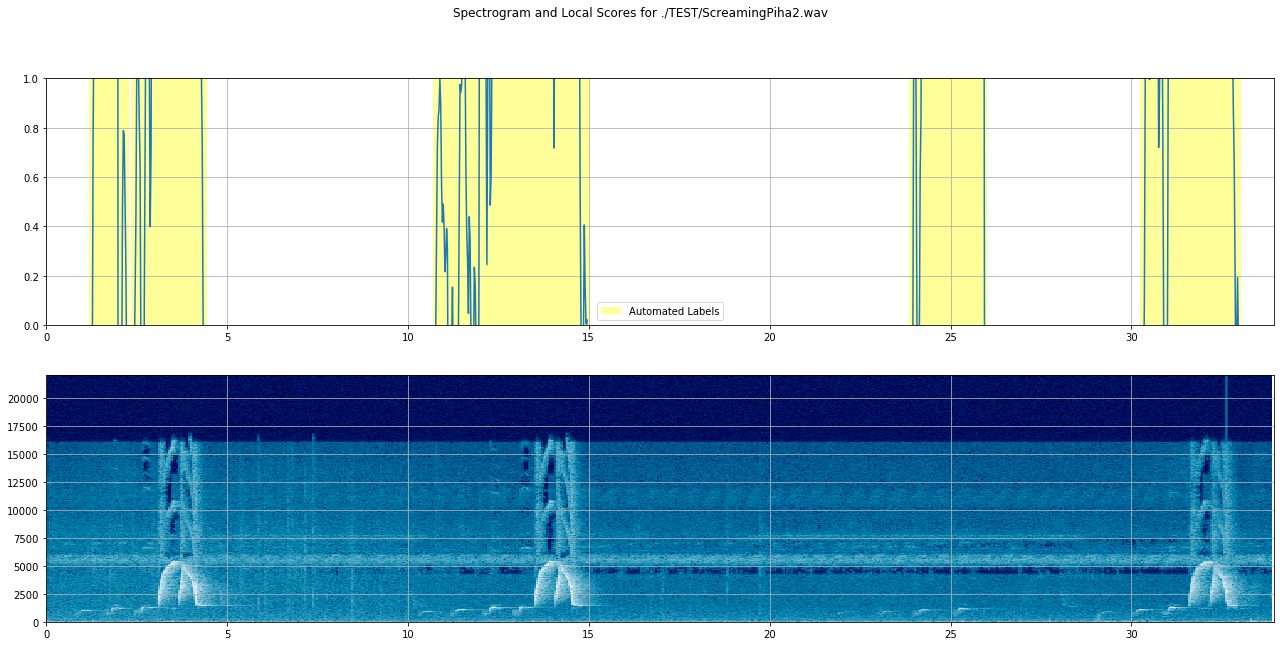

In [16]:
local_score_visualization(clip_path,automated_df = True, isolation_parameters = isolation_parameters, tweety_output=tweety_output)

### Graph with Human Labelling

pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
(1462,)


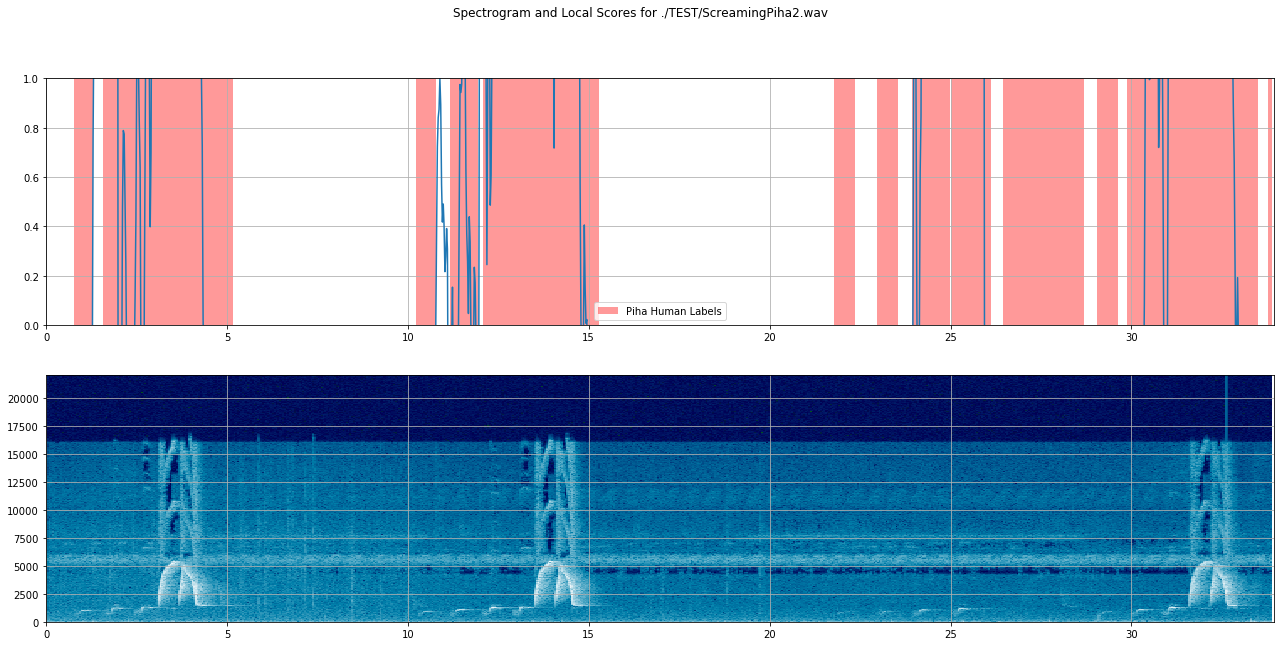

In [17]:
local_score_visualization(clip_path, tweety_output=tweety_output, premade_annotations_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"],premade_annotations_label = "Piha Human Labels")

### Graph with Both Automated and Human Labels 
    Orange ==> True Positive
    Red ==> False Negative
    Yellow ==> False Positive
    White ==> True Negative

pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
(1462,)


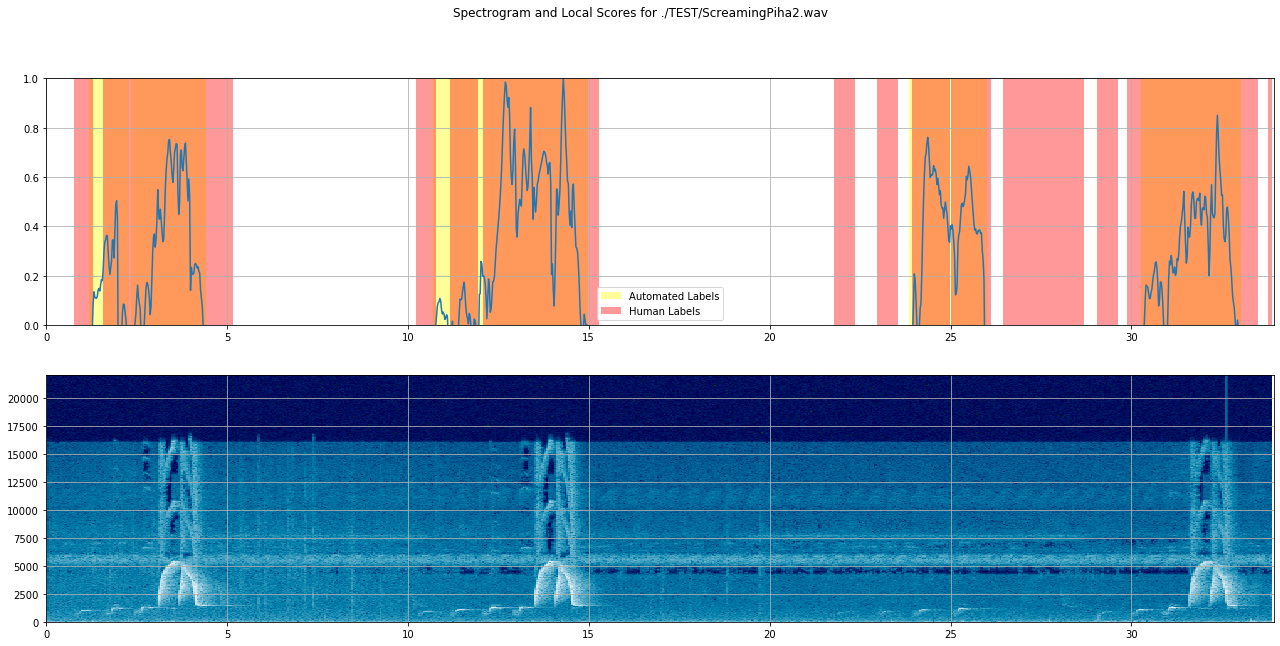

In [18]:
local_score_visualization(clip_path,automated_df = True, normalize_local_scores = True, isolation_parameters=isolation_parameters,tweety_output=tweety_output, premade_annotations_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"])

In [19]:
clip_path_2 = "TEST/Aburria-aburri-257423.wav"
manual_df_2 = pd.read_csv("for_data_science_newline_fixed.csv")


pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
pred shape torch.Size([1, 86])
(1032,)


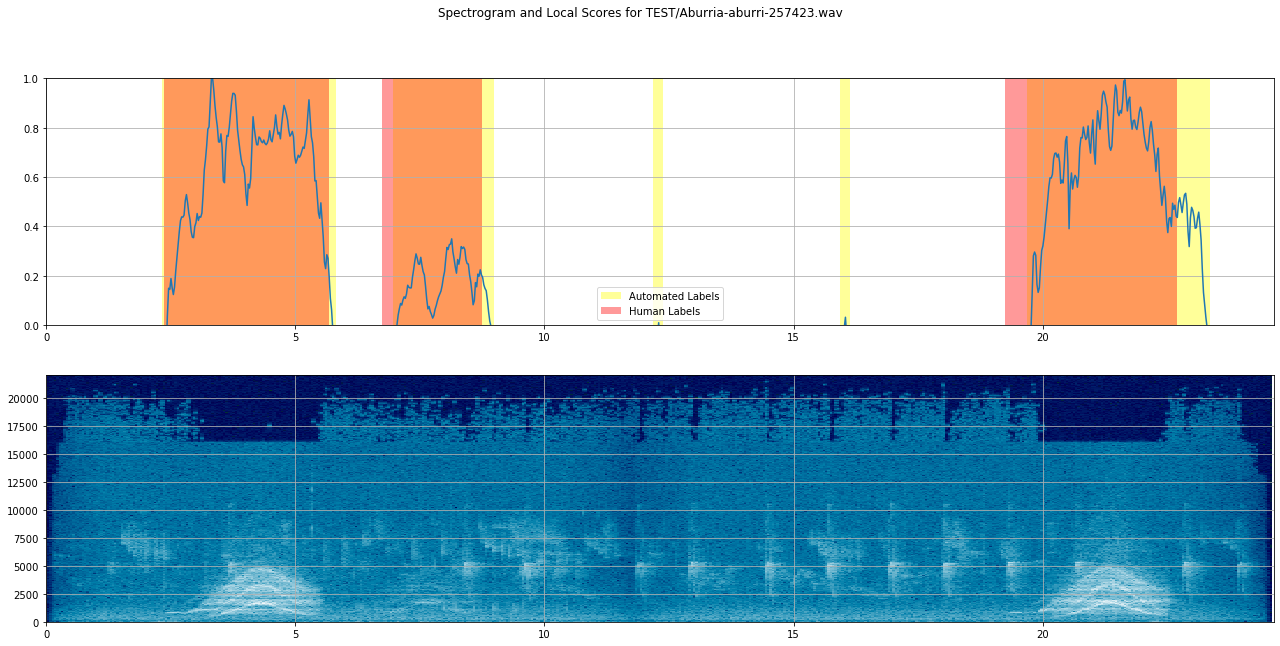

In [20]:
local_score_visualization(clip_path_2,automated_df = True, normalize_local_scores = True, isolation_parameters=isolation_parameters,tweety_output=tweety_output, premade_annotations_df = manual_df_2[manual_df_2["IN FILE"] == "Aburria-aburri-257423.wav"])

### Another Visualization of True Positives, False Positives, False Negatives, and True Negatives 

In [21]:
automated_df


FOLDER                    IN FILE  CHANNEL  CLIP LENGTH  SAMPLE RATE  \
0    ./TEST/  Aburria-aburri-257423.wav        0    24.633469        44100   
1    ./TEST/  Aburria-aburri-257423.wav        0    24.633469        44100   
2    ./TEST/  Aburria-aburri-257423.wav        0    24.633469        44100   
3    ./TEST/  Aburria-aburri-257423.wav        0    24.633469        44100   
4    ./TEST/  Aburria-aburri-257423.wav        0    24.633469        44100   
..       ...                        ...      ...          ...          ...   
154  ./TEST/         ScreamingPiha4.wav        0    13.557551        44100   
155  ./TEST/         ScreamingPiha4.wav        0    13.557551        44100   
156  ./TEST/         ScreamingPiha4.wav        0    13.557551        44100   
157  ./TEST/         ScreamingPiha4.wav        0    13.557551        44100   
158  ./TEST/         ScreamingPiha4.wav        0    13.557551        44100   

        OFFSET  DURATION MANUAL ID  
0     2.333197  3.491973      bird  
1     6.961043  2.036825      bird  
2    12.185261  0.200000      bird  
3    15.930476  0.200000      bird  
4    19.675692  3.682812      bird  
..         ...       ...       ...  
154   3.707483  0.436327      bird  
155   4.285170  0.646395      bird  
156  10.009524  1.355374      bird  
157  11.453741  1.145306      bird  
158  12.897959  0.659592      bird  

[159 rows x 8 columns]

In [22]:
automated_df[automated_df["IN FILE"] == "Aburria-aburri-257423.wav"]

FOLDER                    IN FILE  CHANNEL  CLIP LENGTH  SAMPLE RATE  \
0  ./TEST/  Aburria-aburri-257423.wav        0    24.633469        44100   
1  ./TEST/  Aburria-aburri-257423.wav        0    24.633469        44100   
2  ./TEST/  Aburria-aburri-257423.wav        0    24.633469        44100   
3  ./TEST/  Aburria-aburri-257423.wav        0    24.633469        44100   
4  ./TEST/  Aburria-aburri-257423.wav        0    24.633469        44100   

      OFFSET  DURATION MANUAL ID  
0   2.333197  3.491973      bird  
1   6.961043  2.036825      bird  
2  12.185261  0.200000      bird  
3  15.930476  0.200000      bird  
4  19.675692  3.682812      bird

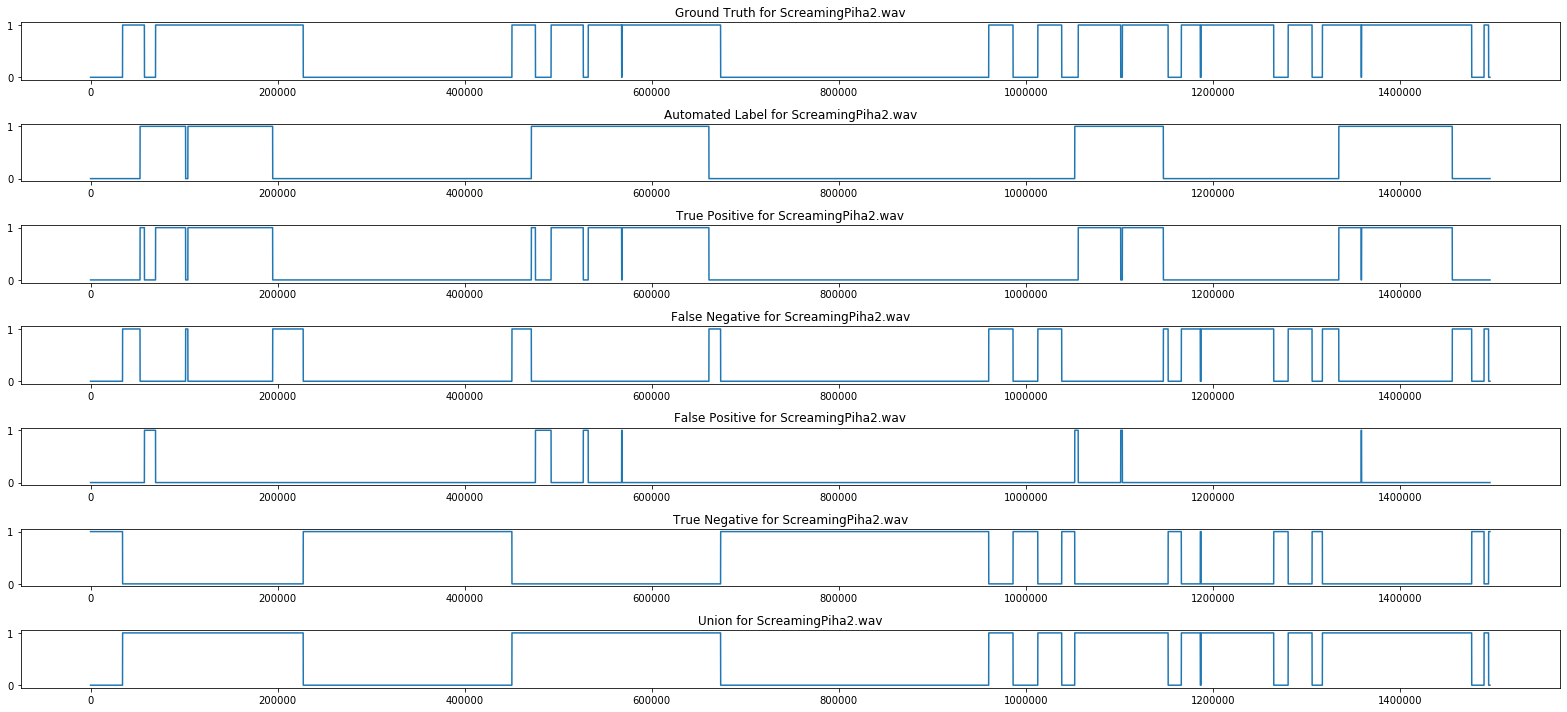

In [23]:
automated_piha_df = automated_df[automated_df["IN FILE"] == "ScreamingPiha2.wav"]
manual_piha_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"]
piha_stats = plot_bird_label_scores(automated_piha_df,manual_piha_df)

### Function that generates statistics to gauge efficacy of automated labeling compared to human labels 

In [24]:
statistics_df = automated_labeling_statistics(automated_df,manual_df,stats_type = "general");
statistics_df

Something went wrong with: Aburria-aburri-257423.wav


FOLDER              IN FILE MANUAL ID  TRUE POSITIVE  FALSE POSITIVE  \
0   ./TEST/   ScreamingPiha9.wav      bird      18.679070        4.745420   
1   ./TEST/   ScreamingPiha8.wav      bird       1.316893        5.182063   
2   ./TEST/  ScreamingPiha10.wav      bird      23.265782       10.113583   
3   ./TEST/   ScreamingPiha1.wav      bird       5.220272        2.711474   
4   ./TEST/  ScreamingPiha11.wav      bird      21.911406        7.820023   
5   ./TEST/   ScreamingPiha3.wav      bird       2.315601        0.470113   
6   ./TEST/   ScreamingPiha2.wav      bird      11.452358        0.914308   
7   ./TEST/   ScreamingPiha6.wav      bird      13.996463        0.688209   
8   ./TEST/   ScreamingPiha7.wav      bird      12.496984       12.198730   
9   ./TEST/   ScreamingPiha5.wav      bird       7.850680        0.006372   
10  ./TEST/   ScreamingPiha4.wav      bird       2.430998        3.267370   

    FALSE NEGATIVE  TRUE NEGATIVE      UNION  PRECISION    RECALL        F1  \
0         9.913356       3.965011  33.337846   0.797416  0.653287  0.718192   
1         5.583197      32.038662  12.082154   0.202632  0.190852  0.196565   
2        16.115510      40.287982  49.494875   0.697011  0.590783  0.639515   
3         9.067937      15.616304  16.999683   0.658149  0.365355  0.469872   
4        15.905964      18.258118  45.637392   0.736978  0.579401  0.648758   
5         2.140091       1.918277   4.925805   0.831241  0.519695  0.639545   
6         7.039365      14.527029  19.406032   0.926067  0.619323  0.742252   
7        10.861791      45.088617  25.546463   0.953134  0.563051  0.707912   
8        39.133220      69.761270  63.828934   0.506039  0.242048  0.327464   
9        27.447959      18.872948  35.305011   0.999189  0.222407  0.363831   
10        2.970567       4.888617   8.668934   0.426613  0.450054  0.438020   

    Global IoU  
0     0.560296  
1     0.108995  
2     0.470064  
3     0.307081  
4     0.480120  
5     0.470096  
6     0.590144  
7     0.547883  
8     0.195789  
9     0.222367  
10    0.280426

### Function that takes the statistical ouput of all of the clips and gets the equivalent global scores 

In [25]:
global_dataset_statistics(statistics_df)

MANUAL ID  PRECISION   RECALL        F1  Global IoU
0      bird   0.715371  0.45275  0.554539    0.383641

### Function that takes in the manual and automated labels for a clip and outputs human label-by-label IoU Scores. Used to derive statistics that measure how well a system is isolating desired segments of audio clips

In [26]:
Intersection_over_Union_Matrix = clip_IoU(automated_piha_df,manual_piha_df)
print(Intersection_over_Union_Matrix)

[[0.     0.3162 0.     0.     0.    ]
 [0.     0.4861 0.     0.     0.    ]
 [0.0694 0.     0.     0.     0.    ]
 [0.     0.     0.0208 0.     0.    ]
 [0.5943 0.0233 0.     0.     0.    ]
 [0.     0.     0.1812 0.     0.    ]
 [0.     0.     0.1881 0.     0.    ]
 [0.     0.     0.1393 0.     0.    ]
 [0.     0.     0.     0.     0.    ]
 [0.     0.     0.3304 0.     0.    ]
 [0.     0.     0.     0.4794 0.    ]
 [0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.439  0.    ]
 [0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.2617]
 [0.     0.     0.     0.     0.1723]
 [0.     0.     0.     0.     0.459 ]
 [0.     0.     0.     0.     0.    ]]


### Function that turns the IoU Matrix of a clip into true positive and false positives values, as well as computing the precision, recall, and F1 statistics

In [27]:
matrix_IoU_Scores(Intersection_over_Union_Matrix,manual_piha_df,0.5)

FOLDER             IN FILE MANUAL ID  TRUE POSITIVE  FALSE NEGATIVE  \
0  ./TEST/  ScreamingPiha2.wav      bird              1              19   

   FALSE POSITIVE  PRECISION  RECALL    F1  
0               4        0.2    0.05  0.08

### Wrapper function that takes matrix_IoU_Scores across multiple clips. Allows user to modify the threshold that determines whether or not a label is a true positive.

In [28]:
stats_df = automated_labeling_statistics(automated_df,manual_df,stats_type = "IoU",threshold = 0.5)
stats_df

Something went wrong with: Aburria-aburri-257423.wav
Division by zero setting precision, recall, and f1 to zero on ScreamingPiha8.wav


FOLDER              IN FILE MANUAL ID  TRUE POSITIVE  FALSE NEGATIVE  \
0   ./TEST/   ScreamingPiha9.wav      bird              8              15   
1   ./TEST/   ScreamingPiha8.wav      bird              0               9   
2   ./TEST/  ScreamingPiha10.wav      bird              5              35   
3   ./TEST/   ScreamingPiha1.wav      bird              3              10   
4   ./TEST/  ScreamingPiha11.wav      bird              9              26   
5   ./TEST/   ScreamingPiha3.wav      bird              2               4   
6   ./TEST/   ScreamingPiha2.wav      bird              1              19   
7   ./TEST/   ScreamingPiha6.wav      bird              8              11   
8   ./TEST/   ScreamingPiha7.wav      bird              2              49   
9   ./TEST/   ScreamingPiha5.wav      bird              3              27   
10  ./TEST/   ScreamingPiha4.wav      bird              1               7   

    FALSE POSITIVE  PRECISION  RECALL      F1  
0               15     0.3478  0.3478  0.3478  
1               10     0.0000  0.0000  0.0000  
2               14     0.2632  0.1250  0.1695  
3                5     0.3750  0.2308  0.2857  
4               13     0.4091  0.2571  0.3158  
5                0     1.0000  0.3333  0.5000  
6                4     0.2000  0.0500  0.0800  
7                2     0.8000  0.4211  0.5518  
8               40     0.0476  0.0392  0.0430  
9                4     0.4286  0.1000  0.1622  
10               6     0.1429  0.1250  0.1334

### Function that takes the output of dataset_IoU Statistics and ouputs a global count of true positives and false positives, as well as computing common metrics across the dataset

In [29]:
global_stats_df = global_IoU_Statistics(stats_df)
global_stats_df

MANUAL ID  TRUE POSITIVE  FALSE NEGATIVE  FALSE POSITIVE  PRECISION  RECALL  \
0      bird             42             212             113      0.271  0.1654   

       F1  
0  0.2054